#### **Importing all the important libraries**

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### **Loading the main data file**

In [328]:
main_df = pd.read_csv('bookdatacs.csv')

## **EDA**

In [329]:
main_df.head()

,reader_id,book_title,page_count,finish,book_category
0,1,The Great Gatsby,180,yes,Fiction
1,2,The Catcher in the Rye,214,no,Fiction
2,3,To Kill a Mockingbird,281,yes,Fiction
3,4,The Grapes of Wrath,436,no,Fiction
4,5,The Hobbit,295,yes,Fantasy


In [330]:
main_df.tail()

,reader_id,book_title,page_count,finish,book_category
98,100,The Alchemist,197,yes,Fiction
99,101,The Catcher in the Rye,214,no,Fiction
100,102,To Kill a Mockingbird,281,yes,Fiction
101,103,The Grapes of Wrath,436,no,Fiction
102,104,The Great Gatsby,180,yes,Fiction


In [331]:
main_df.shape

(103, 5)

In [332]:
print(main_df.dtypes)

reader_id         int64
book_title       object
page_count        int64
finish           object
book_category    object
dtype: object


In [333]:
main_df.apply(lambda x: x.count())

reader_id        103
book_title       103
page_count       103
finish           103
book_category    103
dtype: int64

In [334]:
 main_df.apply(lambda x: [x.unique()])

,reader_id,book_title,page_count,finish,book_category
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[The Great Gatsby, The Catcher in the Rye, To ...","[180, 214, 281, 436, 295, 182, 374, 144, 197, ...","[yes, no]","[Fiction, Fantasy, Non-Fiction, Children's Lit..."


In [335]:
main_df['book_category'].unique()

array(['Fiction', 'Fantasy', 'Non-Fiction', "Children's Literature"],
      dtype=object)

##### *So there are four different book categories or genres.*

#### *Plotting for the count of different book categories*

<AxesSubplot:xlabel='book_category', ylabel='count'>

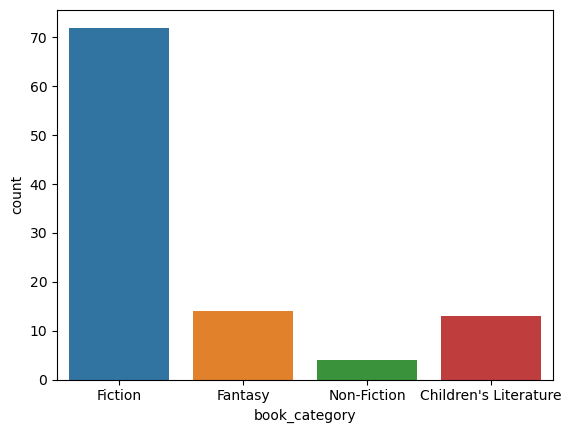

In [336]:
sns.countplot(x=main_df['book_category'])

#### *Plotting for the count of which book categories were finished or not*

<AxesSubplot:xlabel='book_category', ylabel='count'>

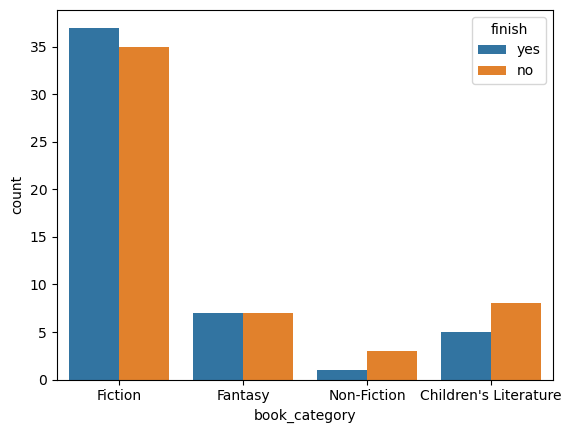

In [337]:
sns.countplot(x=main_df['book_category'],hue=main_df['finish'])

### **Data Cleaning**

In [338]:
main_df[main_df.isnull().any(axis=1)].count()

reader_id        0
book_title       0
page_count       0
finish           0
book_category    0
dtype: int64

<AxesSubplot:>

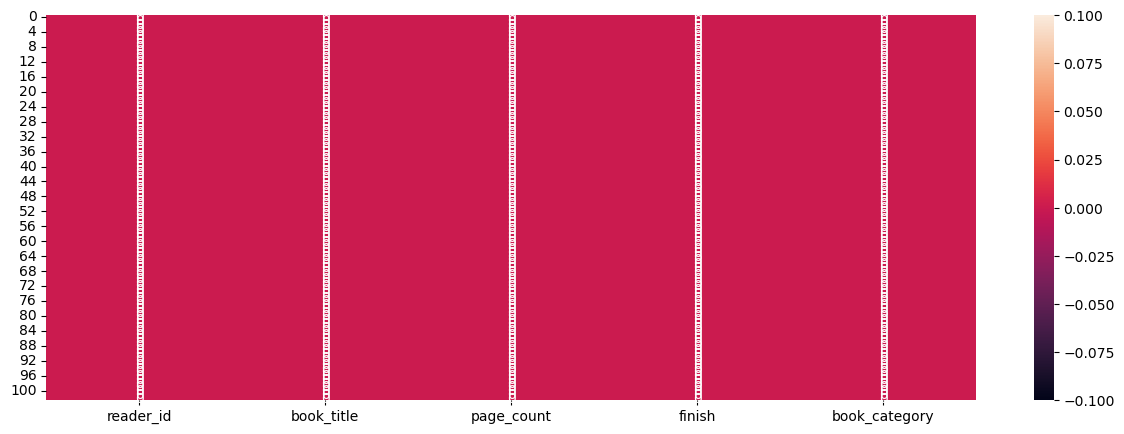

In [339]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(main_df.isnull(), annot=True)

#### *That's Good. There are no missing values.*

### **Data Processing and Feature Selection**

#### **Performing One Code Encoding to deal with categorical features.**

In [340]:
encoded = pd.get_dummies(main_df['book_category'])
merged_data = pd.concat([main_df, encoded], axis='columns')
merged_data.head()

,reader_id,book_title,page_count,finish,book_category,Children's Literature,Fantasy,Fiction,Non-Fiction
0,1,The Great Gatsby,180,yes,Fiction,0,0,1,0
1,2,The Catcher in the Rye,214,no,Fiction,0,0,1,0
2,3,To Kill a Mockingbird,281,yes,Fiction,0,0,1,0
3,4,The Grapes of Wrath,436,no,Fiction,0,0,1,0
4,5,The Hobbit,295,yes,Fantasy,0,1,0,0


#### *Removing features which are not required anymore for the model.*

In [341]:
merged_data.drop(['reader_id'], axis=1, inplace=True) 
merged_data.drop(['book_title'], axis=1, inplace=True) 
merged_data.drop(['book_category'], axis=1, inplace=True) 
merged_data.head()

,page_count,finish,Children's Literature,Fantasy,Fiction,Non-Fiction
0,180,yes,0,0,1,0
1,214,no,0,0,1,0
2,281,yes,0,0,1,0
3,436,no,0,0,1,0
4,295,yes,0,1,0,0


#### *Converting the target label into numeric as sklearn only supports numeric values*

In [342]:
merged_data['finish'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [343]:
merged_data.head()

,page_count,finish,Children's Literature,Fantasy,Fiction,Non-Fiction
0,180,1,0,0,1,0
1,214,0,0,0,1,0
2,281,1,0,0,1,0
3,436,0,0,0,1,0
4,295,1,0,1,0,0


#### **Importing ML Libraries**

In [344]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold   

In [345]:
x=merged_data.drop('finish',axis=1)
y=merged_data['finish']

#### **Splittting data into test and train set**

In [346]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

#### **Building the Model**

In [347]:
classifier=tree.DecisionTreeClassifier()

In [348]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

#### **Getting the Predictions**

In [349]:
predictions = classifier.predict(X_test)

#### **Evaluating the results**

In [350]:
accuracy = metrics.accuracy_score(y_test, predictions) 
print("Accuracy score:",accuracy)

Accuracy score: 0.7619047619047619


#### **That's Good. Accuracy is 76%**

In [351]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.90      0.69      0.78        13

    accuracy                           0.76        21
   macro avg       0.77      0.78      0.76        21
weighted avg       0.80      0.76      0.77        21



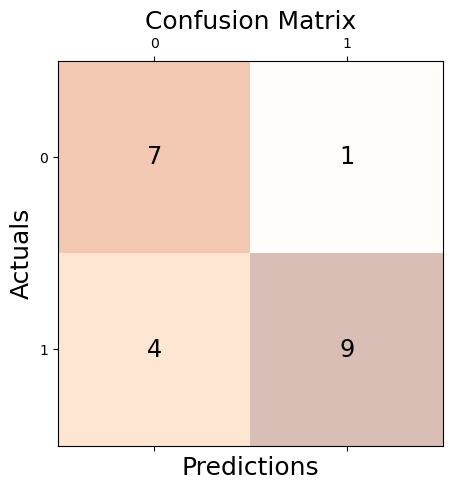

In [352]:
conf_matrix = confusion_matrix(y_test,predictions)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### **Cross checking the model by Hold Out Testing by using KFold Method.**

In [353]:
k = 5  
k_fold = KFold(n_splits = k, random_state = None)  
classifier=tree.DecisionTreeClassifier()
acc_scores = [] 

In [354]:
for training_index, testing_index in k_fold.split(x):  
    X_train, X_test = x.iloc[training_index,:], x.iloc[testing_index,:]  
    Y_train, Y_test = y.iloc[training_index] , y.iloc[testing_index]  
      
    classifier.fit(X_train,Y_train)  
       
    Y_pred = classifier.predict(X_test)  
       
    acc = accuracy_score(Y_pred , Y_test)  
    acc_scores.append(acc) 

In [355]:
mean_acc_score = sum(acc_scores) / k  
   
print("Accuracy score of each fold: ", acc_scores)  
print("Mean accuracy score: ", mean_acc_score) 

Accuracy score of each fold:  [0.38095238095238093, 0.8095238095238095, 0.9523809523809523, 0.75, 0.95]
Mean accuracy score:  0.7685714285714285


##### **Great. By cross validation too, The mean accuracy is 76%**